# Simple filtering using custom kernel

In this example we show how to filter a noisy image using a custom-made gaussian kernel.

First we need to import the necessary modules : **scikit-image** (*for image reading and conversion*), **numpy** (*for basic array manipulation*), **OpenCV** (*imported as cv2, used for the actual filtering*), and **matplotlib** (*to plot the images*).

In [58]:
from skimage import io, img_as_float
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### [OPTIONAL] code snippet for nbconvert (build a pdf or html printable output)

In [60]:
ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

### Import an image and convert it to float

Most of the CV2 filters are expecting a `float` array as an input, so as an additional step we convert the image to floats

In [3]:
img = io.imread('images/embryos_noisy.tif')
float_img =  img_as_float(img)

### Build the kernel

The custom-made gaussian kernel, as a table of weights

In [4]:
kernel =  np.ones((5,5), np.float32)/25

gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

### Create the filtered images

We create the filtered images, showing our custom kernel filtered image, and a native gaussian kernel filtered image.

In [5]:
conv_cv2_kernel = cv2.filter2D(float_img, -1, kernel, borderType=cv2.BORDER_CONSTANT)
conv_cv2_gaussian = cv2.filter2D(float_img, -1, gaussian_kernel, borderType=cv2.BORDER_CONSTANT)

### Showing the results

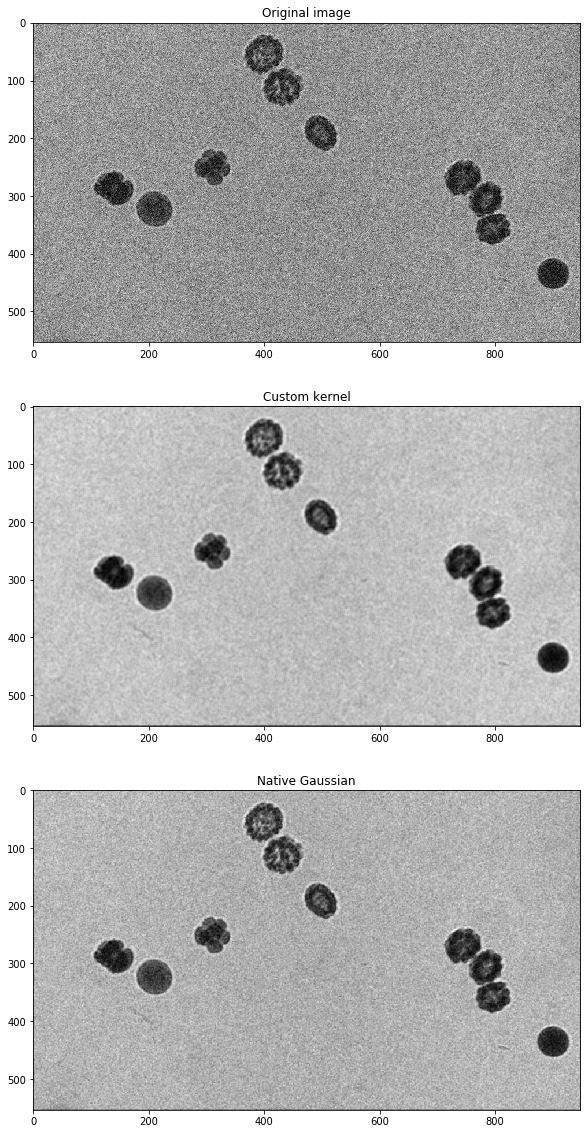

In [5]:
fig = plt.figure(figsize = (20,20))

fig.add_subplot(3, 1, 1)
plt.title('Original image')
plt.imshow(float_img, cmap='gray')

fig.add_subplot(3, 1, 2)
plt.title('Custom kernel')
plt.imshow(conv_cv2_kernel, cmap='gray')

fig.add_subplot(3, 1, 3)
plt.title('Native Gaussian')
plt.imshow(conv_cv2_gaussian, cmap='gray');

### Interactive filtering

We can add some interactivity by using the **ipywidgets** module to display the effect of the filter size and the resulting image. The `interact` function calls another function defining the filter and plotting the image (`plot_filter`) and uses `IntSlider` as a widget that will define the value of the `filter_size` parameter. 

Since the processing can be quite resource intensive, we set `continuous_update` as `False` for smoother interaction.

Here is an example using these tools :

```python
from ipywidgets import interact, IntSlider

def plot_dots(x = 100, step = 10):
    img = np.zeros((x,x))
    for y in range(0,x,step):
        for z in range(0,x,step):
            img[y,z] = 1
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='gray')

interact(plot_dots, x = IntSlider(min=10,max=500,step=2,value=100,continuous_update = False),
         step = IntSlider(min=2,max=50,step=1,value=10,continuous_update = False));
```

Let's implement this in the next cell.

In [55]:
from ipywidgets import interact, IntSlider

def plot_dots(x = 100, step = 10):
    img = np.zeros((x,x))
    for y in range(0,x,step):
        for z in range(0,x,step):
            img[y,z] = 1
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')

interact(plot_dots, x = IntSlider(min=10,max=500,step=2,value=100,continuous_update = False),
         step = IntSlider(min=2,max=50,step=1,value=10,continuous_update = False));

interactive(children=(IntSlider(value=100, continuous_update=False, description='x', max=500, min=10, step=2),…

Now let's do somehting similar for the filtered image :

In [56]:
def plot_filter(filter_size):
    para_kernel =  np.ones((filter_size,filter_size), np.float32)/(filter_size*filter_size)
    conv_cv2_para_kernel = cv2.filter2D(float_img, -1, para_kernel, borderType=cv2.BORDER_CONSTANT)
    plt.figure(figsize=(10,10))
    plt.imshow(conv_cv2_para_kernel, cmap='gray')
    plt.show()

interact(plot_filter, filter_size = IntSlider(min=3,max=30,step=2,value=3,continuous_update = False));

interactive(children=(IntSlider(value=3, continuous_update=False, description='filter_size', max=30, min=3, st…